In [14]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

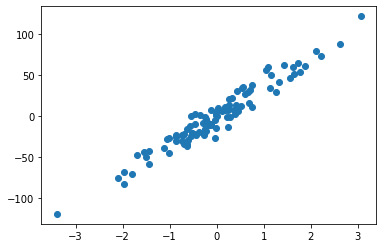

In [15]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y)

In [19]:
print(x.shape)
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100, 1)


In [22]:
#Matrice X
X = np.hstack((x, np.ones(x.shape)))
X

array([[-1.97067574,  1.        ],
       [-1.55580308,  1.        ],
       [ 0.75999437,  1.        ],
       [-1.44331147,  1.        ],
       [ 0.53977776,  1.        ],
       [-2.10594264,  1.        ],
       [ 0.55478528,  1.        ],
       [-0.37301006,  1.        ],
       [-0.29157409,  1.        ],
       [-0.6126855 ,  1.        ],
       [ 0.51920777,  1.        ],
       [-0.12087816,  1.        ],
       [ 1.05546389,  1.        ],
       [ 0.75337672,  1.        ],
       [ 1.25166859,  1.        ],
       [-0.48035952,  1.        ],
       [-1.01705971,  1.        ],
       [ 2.21528937,  1.        ],
       [ 0.01003642,  1.        ],
       [-0.12965602,  1.        ],
       [ 1.86664715,  1.        ],
       [ 1.77564045,  1.        ],
       [-1.12431971,  1.        ],
       [-1.00496089,  1.        ],
       [ 0.25763231,  1.        ],
       [ 0.44411239,  1.        ],
       [-1.80507199,  1.        ],
       [ 0.02374153,  1.        ],
       [-0.03480885,

In [25]:
theta = np.random.randn(2, 1)
theta

array([[-1.59777252],
       [-2.39981544]])

In [27]:
def model(X, theta):
    return X.dot(theta)

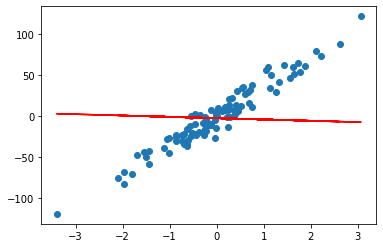

In [33]:
plt.scatter(x, y)
plt.plot(x, model(X,theta), c='red')

In [38]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [39]:
cost_function(X, y, theta)

813.2413699159357

In [41]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [59]:
def gradient_descent(X, y, theta, learning_rate, n):
    cost_history = np.zeros(n)
    for i in range(n):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [60]:
theta_final, cost_history = gradient_descent(X, y, theta, 0.01, 1000)

In [61]:
theta_final

array([[35.49070614],
       [ 0.26958467]])

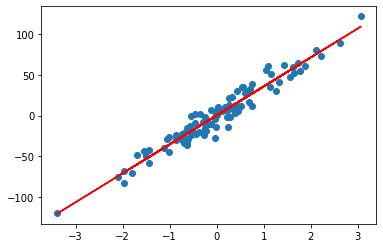

In [62]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x , predictions, c='red')

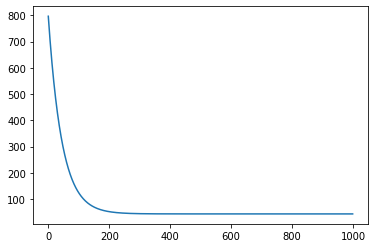

In [63]:
plt.plot(range(1000), cost_history)

In [65]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum() 
    v = ((y - y.mean())**2).sum()
    return 1 - (u/v)

In [66]:
coef_determination(y, predictions)

0.9409929063736368